# TikZ-Feynman

In [1]:
from pyfeyn2.feynmandiagram import FeynmanDiagram, Leg, Propagator, Vertex, Line,PDG
from pyfeyn2.render.latex.tikzfeynman import TikzFeynmanRender
from pyfeyn2.auto.position import feynman_adjust_points
import pyfeyn2
print(pyfeyn2.__version__)

2.0.7.46


## Simple Case

We set the positions of all vertices here.

In [2]:
v1 = Vertex("v1").with_xy(-1, 0)
v2 = Vertex("v2").with_xy(1, 0)

fd = FeynmanDiagram().add(
    v1,v2,
    Propagator(name="g",bend=True).connect(v1, v2),
    Leg(name="g",bend=True).with_target(v1).with_xy(-2, 1).with_incoming(),
    Leg(name="g",bend=True).with_target(v1).with_xy(-2, -1).with_incoming().with_class("notred"),
    Leg(name="g",bend=True).with_target(v2).with_xy(2, 1).with_outgoing().with_class("red"),
    Leg("myid1",name="g",bend=True).with_target(v2).with_xy(2, -1).with_outgoing()
)

### Style

In [3]:
fd = fd.with_rule("""
* {
    bend-direction: left;
    color: green;
}
""")

In [4]:
fd.add_rules("""
.red {
    color: red;
}
.notred {
    color: blue;
}
#myid1 {
    color: gray;
}
[pdgid=21] {
    color: black;
}
#myid2 {
    color: gray;
}
""")
fd.sheet.cssText

b'* {\n    bend-direction: left;\n    color: green\n    }\n.red {\n    color: red\n    }\n.notred {\n    color: blue\n    }\n#myid1 {\n    color: gray\n    }\n#myid2 {\n    color: gray\n    }'

In [5]:
fd.to_xml()

'<?xml version="1.0" encoding="UTF-8"?>\n<diagram default_style="true" style="* {&#10;    bend-direction: left;&#10;    color: green&#10;    }&#10;.red {&#10;    color: red&#10;    }&#10;.notred {&#10;    color: blue&#10;    }&#10;#myid1 {&#10;    color: gray&#10;    }&#10;#myid2 {&#10;    color: gray&#10;    }">\n  <propagator id="Propagator6" pdgid="21" type="gluon" style="" bend="true">\n    <name>g</name>\n    <source>v1</source>\n    <target>v2</target>\n  </propagator>\n  <vertex id="v1" style="" x="-1.0" y="0.0"/>\n  <vertex id="v2" style="" x="1.0" y="0.0"/>\n  <leg id="Leg7" pdgid="21" type="gluon" style="" bend="true" x="-2.0" y="1.0">\n    <name>g</name>\n    <target>v1</target>\n    <sense>incoming</sense>\n  </leg>\n  <leg id="Leg8" pdgid="21" type="gluon" style="" class="notred" bend="true" x="-2.0" y="-1.0">\n    <name>g</name>\n    <target>v1</target>\n    <sense>incoming</sense>\n  </leg>\n  <leg id="Leg9" pdgid="21" type="gluon" style="" class="red" bend="true" x="2.0

In [6]:
tfd = TikzFeynmanRender(fd)
print(tfd.get_src())

\documentclass[preview,crop,tikz]{standalone}%
\usepackage[T1]{fontenc}%
\usepackage[utf8]{inputenc}%
\usepackage{lmodern}%
\usepackage{textcomp}%
\usepackage{lastpage}%
%
\RequirePackage{luatex85}%
\usepackage[compat=1.1.0]{tikz-feynman}%
%
\begin{document}%
\normalsize%
\begin{tikzpicture}
\begin{feynman}
	\vertex (v1) [] at (-1.0,0.0);
	\vertex (v1clone) [] at (-1.0,0.0);
	\vertex (v2) [] at (1.0,0.0);
	\vertex (v2clone) [] at (1.0,0.0);
	\vertex (Leg7) [] at (-2.0,1.0);
	\vertex (Leg8) [] at (-2.0,-1.0);
	\vertex (Leg9) [] at (2.0,1.0);
	\vertex (myid1) [] at (2.0,-1.0);
	\diagram*{
		(v1) -- [gluon,green,bend left] (v2),
		(Leg7) -- [gluon,green,bend left] (v1),
		(Leg8) -- [gluon,blue,bend left] (v1),
		(v2) -- [gluon,red,bend left] (Leg9),
		(v2) -- [gluon,gray,bend left] (myid1),
	};
\end{feynman}
\end{tikzpicture}
%
\end{document}


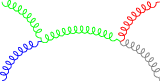

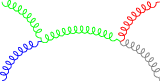

In [7]:
tfd.render("test.pdf")

## Complicated Case

We only set the positions of the Legs here.

In [8]:
fd = FeynmanDiagram().with_rules(
    """ * {color: red;} 
        [type=fermion] {color: blue; line: gluon}
        #p1 {color: green;}
        :not([type=fermion]) { color : black; line: fermion}""")
v1 = Vertex("v1")
v2 = Vertex("v2")
v3 = Vertex("v3")
v4 = Vertex("v4")
p1 = Propagator("p1").connect(v1, v2).with_type("gluon")
p2 = Propagator("p2").connect(v1, v3).with_type("gluon")
p3 = Propagator("p3").connect(v3, v2).with_type("gluon")
p4 = Propagator("p4").connect(v4, v3).with_type("gluon")
p5 = Propagator("p5").connect(v4, v2).with_type("gluon")
l1 = Leg("l1").with_target(v1).with_type("gluon").with_incoming().with_xy(-2, 1)
l2 = Leg("l2").with_target(v1).with_type("gluon").with_incoming().with_xy(-2, -1)
l3 = Leg("l3").with_target(v2).with_type("fermion").with_outgoing().with_xy(2, -2).with_class("blue")
l4 = Leg("l4").with_target(v3).with_type("fermion").with_outgoing().with_xy(2, 2)
l5 = Leg("l5").with_target(v4).with_type("gluon").with_outgoing().with_xy(2, 1)
l6 = Leg("l6").with_target(v4).with_type("gluon").with_outgoing().with_xy(2, -1)

l6.style.color = "orange"

fd.propagators.extend([p1, p2, p3, p4, p5])
fd.vertices.extend([v1, v2, v3, v4])
fd.legs.extend([l1, l2, l3, l4, l5, l6])

Now calculate the positions of vertices.

In [9]:
ffd= feynman_adjust_points(fd)

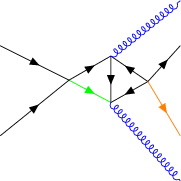

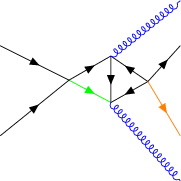

In [10]:
TikzFeynmanRender(ffd).render()